In [24]:
from pathlib import Path
from scipy.stats import wilcoxon
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
#trajectories from 'plot_Fig4_S15_S16'
shelf_traj180 = xr.open_dataset("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/traj_onshelf180.nc")
shelf_traj100 = xr.open_dataset("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/traj_onshelf100.nc")
year_list = np.arange(2007,2017).tolist()

In [4]:
#part_numbers per year 102
part_num100 = np.zeros_like(year_list)

for i,year in enumerate(year_list):
    ds = shelf_traj100
    part_num = ds.where(ds.time.isel(obs = 0).dt.year == int(year),drop = True).traj.shape[0]
    part_num100[i] = part_num
    print(str(year) + f': {part_num}')

print(f'sum: {np.round(np.sum(part_num100))}')
print(f'std: {np.round(np.std(part_num100))}')

2007: 37
2008: 971
2009: 58
2010: 1172
2011: 235
2012: 145
2013: 636
2014: 410
2015: 2397
2016: 3434
sum: 9495
std: 1072.0


In [5]:
#part_numbers per year 102
part_num180 = np.zeros_like(year_list)

for i,year in enumerate(year_list):
    ds = shelf_traj180
    part_num = ds.where(ds.time.isel(obs = 0).dt.year == int(year),drop = True).traj.shape[0]
    part_num180[i] = part_num
    print(str(year) + f': {part_num}')

print(f'sum: {np.round(np.sum(part_num180))}')
print(f'std: {np.round(np.std(part_num180))}')

2007: 593
2008: 1918
2009: 499
2010: 2963
2011: 1970
2012: 962
2013: 1626
2014: 1299
2015: 1783
2016: 14083
sum: 27696
std: 3834.0


In [6]:
#wilcoxon test (non parm. paired t test)
print('Abundace t-test:')
res = wilcoxon(part_num100, part_num180, mode='exact')
res.statistic, res.pvalue

Abundace t-test:


(3.0, 0.009765625)

## Net Distance 

In [7]:
def haversine_distance_traj(ds, end_ind = -2,year = None):
    
    if year:
        
        ds = ds.where(ds.time.isel(obs = 0).dt.year == year,drop = True)
    
    start = ds.isel(obs = 0)
    end = ds.isel(obs = end_ind)
    
    r_earth = 6371.0
    
    lat1 = start['lat'].values#[:, np.newaxis]
    lon1 = start['lon'].values#[:, np.newaxis]
    lat2 = end['lat'].values#[np.newaxis, :]
    lon2 = end['lon'].values#[np.newaxis, :]
    
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))* r_earth
    
    if end_ind == -2:
        day_str = "181"
    else:
        day_str = "102"
        
    print(f'snapshot of number of particels at day {day_str} on shelf: {ds.traj.values.shape}')
    print(f'Mean net distance travelled {day_str} days: {np.round(np.mean(c),1)} km')
    print(f'std: {np.round(np.std(c),1)} km')
    return  np.mean(c)

## Single years (102 Days)

In [8]:
year_list = np.arange(2007,2017).tolist()
net_dist100= np.zeros_like(year_list, dtype = 'float')
for i,year in enumerate(year_list):
    print(year)
    part_ = haversine_distance_traj(shelf_traj100, end_ind = 101, year = int(year))
    net_dist100[i] = part_

2007
snapshot of number of particels at day 102 on shelf: (37,)
Mean net distance travelled 102 days: 278.7 km
std: 10.8 km
2008
snapshot of number of particels at day 102 on shelf: (971,)
Mean net distance travelled 102 days: 282.0 km
std: 17.7 km
2009
snapshot of number of particels at day 102 on shelf: (58,)
Mean net distance travelled 102 days: 304.6 km
std: 32.7 km
2010
snapshot of number of particels at day 102 on shelf: (1172,)
Mean net distance travelled 102 days: 290.5 km
std: 20.6 km
2011
snapshot of number of particels at day 102 on shelf: (235,)
Mean net distance travelled 102 days: 386.5 km
std: 156.5 km
2012
snapshot of number of particels at day 102 on shelf: (145,)
Mean net distance travelled 102 days: 301.2 km
std: 32.3 km
2013
snapshot of number of particels at day 102 on shelf: (636,)
Mean net distance travelled 102 days: 318.6 km
std: 19.2 km
2014
snapshot of number of particels at day 102 on shelf: (410,)
Mean net distance travelled 102 days: 302.5 km
std: 23.4 km


In [9]:
#102 net
part_ = haversine_distance_traj(shelf_traj100, end_ind = 101)
#test weighted avg
print(np.round(np.average(net_dist100,weights = part_num100),1))

snapshot of number of particels at day 102 on shelf: (9495,)
Mean net distance travelled 102 days: 304.7 km
std: 40.4 km
304.7


## 181 Days

In [10]:
#181 days
net_dist180= np.zeros_like(year_list, dtype = 'float')
for year in year_list:
    print(year)
    part_ = haversine_distance_traj(shelf_traj180, year = int(year))
    net_dist180[i] = part_

2007
snapshot of number of particels at day 181 on shelf: (593,)
Mean net distance travelled 181 days: 316.0 km
std: 58.7 km
2008
snapshot of number of particels at day 181 on shelf: (1918,)
Mean net distance travelled 181 days: 363.2 km
std: 125.6 km
2009
snapshot of number of particels at day 181 on shelf: (499,)
Mean net distance travelled 181 days: 383.6 km
std: 133.7 km
2010
snapshot of number of particels at day 181 on shelf: (2963,)
Mean net distance travelled 181 days: 327.2 km
std: 54.1 km
2011
snapshot of number of particels at day 181 on shelf: (1970,)
Mean net distance travelled 181 days: 442.1 km
std: 178.8 km
2012
snapshot of number of particels at day 181 on shelf: (962,)
Mean net distance travelled 181 days: 309.1 km
std: 27.2 km
2013
snapshot of number of particels at day 181 on shelf: (1626,)
Mean net distance travelled 181 days: 448.0 km
std: 215.5 km
2014
snapshot of number of particels at day 181 on shelf: (1299,)
Mean net distance travelled 181 days: 319.1 km
std:

In [11]:
#181 net
part_ = haversine_distance_traj(shelf_traj180)
print(np.round(np.average(net_dist180,weights = part_num180),1))

snapshot of number of particels at day 181 on shelf: (27696,)
Mean net distance travelled 181 days: 339.2 km
std: 104.2 km
157.6


In [12]:
print('Net distance t-test:')
res = wilcoxon(net_dist100, net_dist180, mode='exact')
res.statistic, res.pvalue


Net distance t-test:


(1.0, 0.00390625)

## Total Distance Travelled


2007: 630.0 km,   std: 21.4
2008: 576.5 km,   std: 40.4
2009: 742.2 km,   std: 91.4
2010: 668.0 km,   std: 161.6
2011: 800.6 km,   std: 135.1
2012: 669.3 km,   std: 261.4
2013: 610.7 km,   std: 35.5
2014: 848.8 km,   std: 172.9
2015: 761.8 km,   std: 104.6
2016: 520.9 km,   std: 90.7


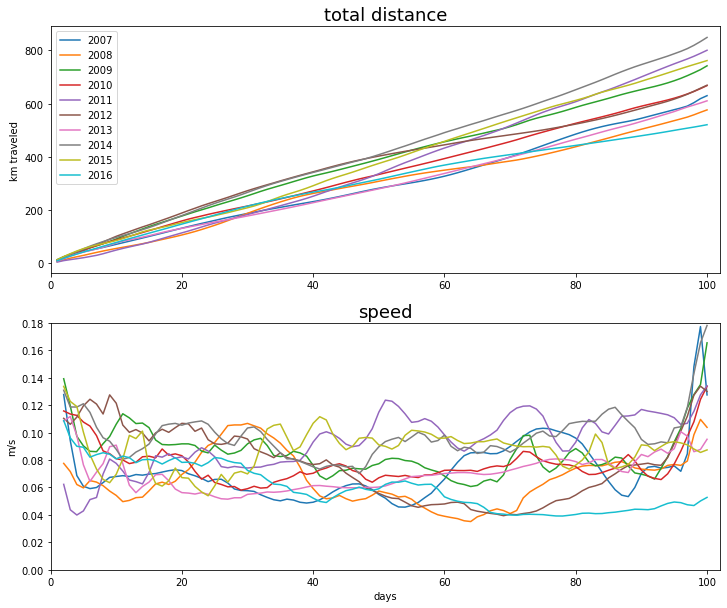

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
tot_dist100 = np.zeros_like(net_dist100)
tot_dist100std = np.zeros_like(net_dist100)

for i,year in enumerate(year_list):

    ds = shelf_traj100
    ds = ds.where(ds.time.isel(obs =0).dt.year == int(year),drop = True).isel(obs = slice(0,101))
    x = ds["lon"].values * (2 * np.pi * 6371 * np.cos(np.radians(ds["lat"].values))) / 360
    y = ds["lat"].values * 111.32

    dist = np.cumsum(
    np.sqrt(np.square(np.diff(x)) + np.square(np.diff(y))), axis=1
    )  # d = (dx^2 + dy^2)^(1/2)
    
    dist_std = dist.std(axis = 0)
    distance = dist.mean(axis = 0)
    tot_dist100[i] = np.round(distance.T[-1],1)
    tot_dist100std[i] = np.round(dist_std[-1],1)
    
    days = np.arange(distance.shape[0])+1
    ax[0].plot(days,distance.T, label= year)
    print(str(year) + f': {np.round(distance.T[-1],1)} km,   std: {np.round(dist_std[-1],1)}')
    
    ax[1].plot(days[1:],np.ediff1d(distance.T)/24/60/60 *1000, label= year)
    
ax[1].set_xlabel('days')
ax[1].set_ylim(0,0.18)
ax[1].set_xlim(0,102)
ax[0].set_xlim(0,102)
ax[0].set_ylabel('km traveled')
ax[1].set_ylabel('m/s')
ax[0].set_title('total distance', fontsize = 18)
ax[1].set_title('speed', fontsize = 18)
ax[0].legend()

In [15]:
print(np.round(np.average(tot_dist100,weights = part_num100),1))
print(np.round(np.average(tot_dist100std,weights = part_num100),1))

636.7
101.1


2007: 893.3 km,   std: 127.9
2008: 1013.2 km,   std: 180.8
2009: 1051.2 km,   std: 181.6
2010: 1091.1 km,   std: 250.6
2011: 1227.8 km,   std: 287.2
2012: 1230.9 km,   std: 341.6
2013: 977.1 km,   std: 194.7
2014: 1234.5 km,   std: 208.7
2015: 1397.6 km,   std: 297.4
2016: 836.1 km,   std: 190.8


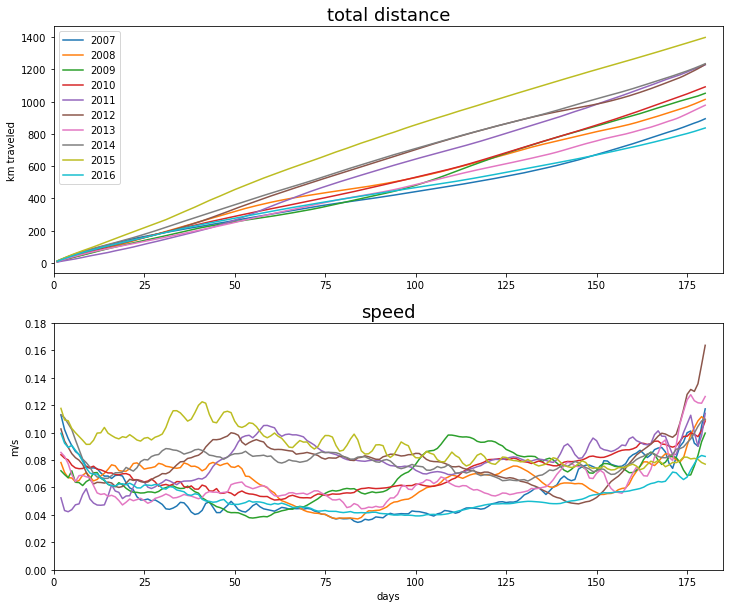

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
tot_dist180 = np.zeros_like(net_dist100)
tot_dist180std = np.zeros_like(net_dist100)

for i,year in enumerate(year_list):

    ds = shelf_traj180
    ds = ds.where(ds.time.isel(obs =0).dt.year == int(year),drop = True).isel(obs = slice(0,-1))
    x = ds["lon"].values * (2 * np.pi * 6371 * np.cos(np.radians(ds["lat"].values))) / 360
    y = ds["lat"].values * 111.32

    dist = np.cumsum(
    np.sqrt(np.square(np.diff(x)) + np.square(np.diff(y))), axis=1
    )  # d = (dx^2 + dy^2)^(1/2)
    
    dist_std = dist.std(axis = 0)
    distance = dist.mean(axis = 0)
    tot_dist180[i] = np.round(distance.T[-1],1)
    tot_dist180std[i] = np.round(dist_std[-1],1)
    days = np.arange(distance.shape[0])+1
    ax[0].plot(days,distance.T, label= year)
    print(str(year) + f': {np.round(distance.T[-1],1)} km,   std: {np.round(dist_std[-1],1)}')
    
    ax[1].plot(days[1:],np.ediff1d(distance.T)/24/60/60 *1000, label= year)

ax[1].set_xlabel('days')
ax[1].set_ylim(0,0.18)
ax[1].set_xlim(0,185)
ax[0].set_xlim(0,185)
ax[0].set_ylabel('km traveled')
ax[1].set_ylabel('m/s')
ax[0].set_title('total distance', fontsize = 18)
ax[1].set_title('speed', fontsize = 18)
ax[0].legend()

In [19]:
print(np.round(np.average(tot_dist180,weights = part_num180),1))
print(np.round(np.average(tot_dist180std,weights = part_num180),1))

985.4
215.0


In [20]:
print('Total distance t-test:')
res = wilcoxon(tot_dist100, tot_dist180, mode='exact')
res.statistic, res.pvalue

Total distance t-test:


(0.0, 0.001953125)

## Area

In [21]:
#load bathymetry and target ones 
data_path = Path("/gxfs_work1/geomar/smomw355/model_data/ocean-only/VIKING20X.L46-KFS003/nemo/output/")

x_lines = [-25, -20,-15,-10]
y_lines = [16,18,20,22,24,26,28,30]

u_file = list(Path(data_path).glob(f"1_VIKING20X.L46-KFS003_1m_{year_list[0]}*grid_U.nc"))
v_file = list(Path(data_path).glob(f"1_VIKING20X.L46-KFS003_1m_{year_list[0]}*grid_V.nc"))

ds_u = xr.open_dataset(u_file[0]).vozocrtx[:,0:5,:,:]
ds_v = xr.open_dataset(v_file[0]).vomecrty[:,0:5,:,:]

ulat = ds_u.coords["nav_lat"].values[:,0]
ulon = ds_u.coords["nav_lon"].values[0,:]

y_ind = np.where((ulat > y_lines[0]) & (ulat < 30))[0]
x_ind = np.where((ulon > x_lines[0]) & (ulon < x_lines[-1]))[0]
    
u_conc = ds_u[:,:,y_ind,x_ind].mean("depthu").mean('time_counter')
v_conc = ds_v[:,:,y_ind,x_ind].mean("depthv").mean('time_counter')

t_file = "1_VIKING20X.L46-KFS003_1d_20110101_20111231_grid_T.nc"
t = xr.open_dataset(data_path / t_file)

t_lat = t.coords["nav_lat"].values[1:,0]
t_lon = t.coords["nav_lon"].values[0,:]

t_sel = t.vosaline[:,:,y_ind,x_ind].sel(time_counter = "2011-01-01")

depth_ind = t_sel.where(t_sel == 0).fillna(1).sum(dim = "deptht").astype('int') #depth of cell
depth_tgrid =  t_sel.deptht.isel(deptht = depth_ind)
mesh_t_lon, mesh_t_lat = np.meshgrid(t_lon[x_ind],t_lat[y_ind])

lat_bins = t_sel.coords['nav_lat'].values[:,0]#change lat bins to VIKING resolution
lon_bins = t_sel.coords['nav_lon'].values[0,:]
#old bin sizes
bath = depth_tgrid.squeeze()[1:,:-1]
#bath.plot()# bathy. at each bin 
bath_canary = bath.where((bath['nav_lat'] >=27.65)&(bath['nav_lon'] <=-14.45))
bath_canary2 = bath.where((bath['nav_lat'] >=28)&(bath['nav_lon'] <=-13.45))
bath_canary3 = bath.where((bath['nav_lat'] >=28.9)&(bath['nav_lon'] <=-12.8))
bath_fuerte = bath.where((bath['nav_lat'] >=28.4)&(bath['nav_lon'] <=-13.2))#cut eastern side of fuerteventure, Lanzarote
bath_smount = bath.where((bath['nav_lat'] >=29.5)&(bath['nav_lon'] <=-11.9))#cut  conception seamount

#for release zone
bath_relzone = bath.where((bath_canary == bath)&(bath['nav_lon'] >=-17)&(bath['nav_lon'] <=-16)&(bath>4)&(bath<500))
#bath_canary.plot(size = 10)
bath_fuerte.shape
#african shelf
bath_afr = bath.where((bath_canary != bath)&(bath_canary3 != bath)&(bath_canary2 != bath)&(bath_fuerte != bath)&(bath_smount != bath)&(bath['nav_lon'] >=-18.5))
#bath_afr.shape
#bath_afr.plot(x = 'nav_lon',y='nav_lat',size = 10)

In [25]:
year_list = np.arange(2007,2017).tolist()
heatmap_list = year_list.copy()


for i,year in enumerate(year_list):
    
    hm_name = f"/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/heatmaps_1st_gen{year}.nc"
    hm = xr.open_dataarray(Path(hm_name))
    heatmap_list[i] = hm.where(hm > 0).where(bath_afr.values < 500)

In [26]:
hm_ = heatmap_list[i].isel(obs = slice(0,101)).mean('obs')
x_mesh,y_mesh = np.meshgrid(hm_['lon_bin'] ,hm_['lat_bin'])
#dy_km = np.diff(depth_tgrid['nav_lat'] * 111.32,axis = 0)
dy_km = np.gradient(y_mesh * 111.32,axis = 0)
dy_km.shape
dx_km = np.gradient(x_mesh* (np.pi/180 * 6371 * np.cos(np.radians(y_mesh))),axis = 1)
dx_km.shape

(307, 299)

2007: 1654.9 km^2
2008: 3011.0 km^2
2009: 4319.8 km^2
2010: 9646.6 km^2
2011: 6972.1 km^2
2012: 7399.5 km^2
2013: 5588.4 km^2
2014: 6227.5 km^2
2015: 30578.5 km^2
2016: 5745.8 km^2


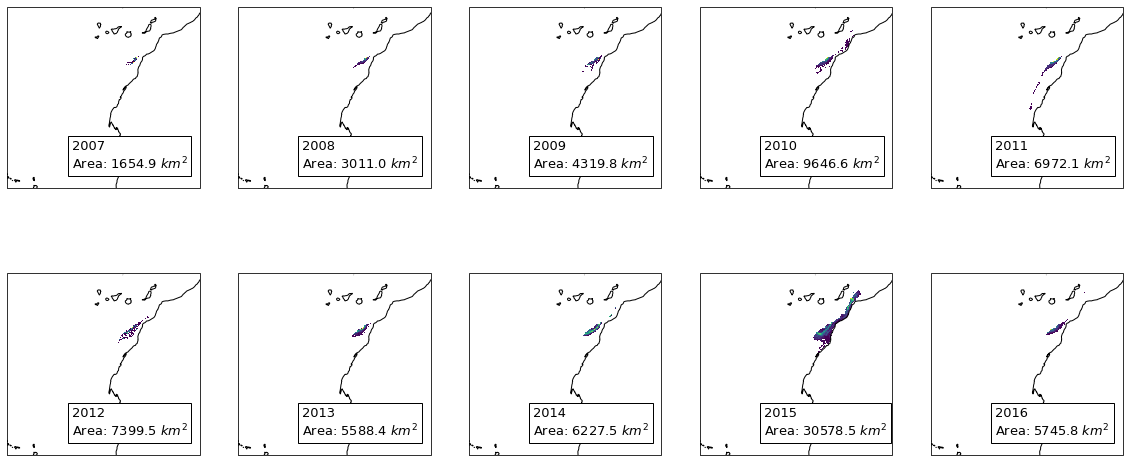

In [27]:
#day 102
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(2, 5, subplot_kw={"projection": proj}, figsize=(20,9))
axs = ax.ravel()
area100 = np.zeros_like(tot_dist100)

for i,year in enumerate(year_list):
    area = xr.where(heatmap_list[i].isel(obs = slice(0,101)).mean('obs')>0,dx_km*dy_km,0).sum().values
    area100[i] = area
    area = np.round(area,1)
    print(str(year)+ f': {"{:0.1f}".format(area)} km^2')

    heatmap_list[i].isel(obs = slice(0,101)).mean('obs').plot.pcolormesh(x = 'lon_bin', y = 'lat_bin',ax = axs[i], add_colorbar = False)

    axs[i].annotate(f'{year_list[i]}\nArea: {"{:0.1f}".format(area)} $km^2$',(-20.0,17.5),bbox={"fc": "white", "ec": "k", "lw": 1}, fontsize = 13 )#on africa
    axs[i].coastlines()

2007: 22522.1 km^2
2008: 36282.9 km^2
2009: 31228.3 km^2
2010: 41251.7 km^2
2011: 68070.2 km^2
2012: 13940.0 km^2
2013: 41947.4 km^2
2014: 20166.4 km^2
2015: 56731.5 km^2
2016: 46861.9 km^2


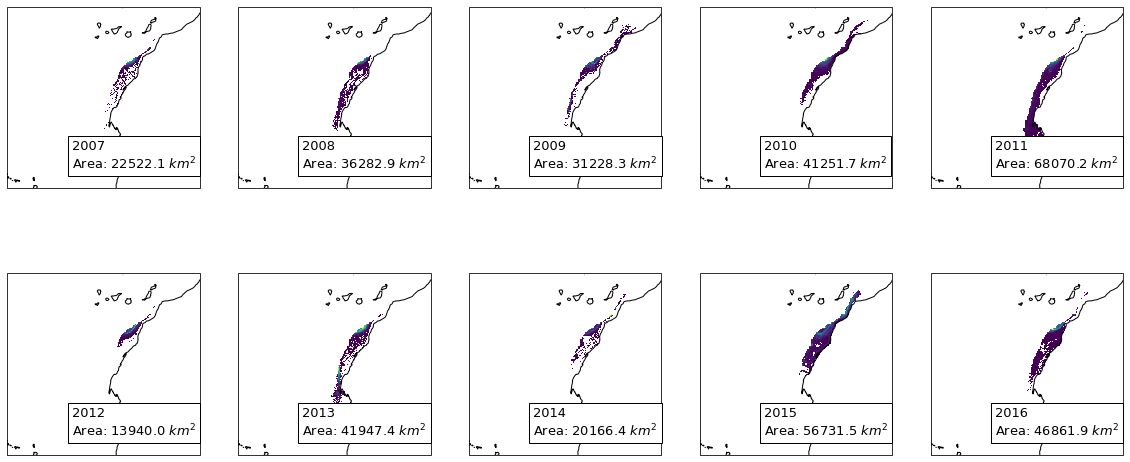

In [28]:
#day 102
fig, ax = plt.subplots(2, 5, subplot_kw={"projection": proj}, figsize=(20,9))
axs = ax.ravel()
area180 = np.zeros_like(tot_dist100)
for i,year in enumerate(year_list):
    area = xr.where(heatmap_list[i].isel(obs = slice(0,180)).mean('obs')>0,dx_km*dy_km,0).sum().values
    area180[i] = area
    area = np.round(area,1)
    print(str(year)+ f': {"{:0.1f}".format(area)} km^2')

    heatmap_list[i].isel(obs = slice(0,180)).mean('obs').plot.pcolormesh(x = 'lon_bin', y = 'lat_bin',ax = axs[i], add_colorbar = False)

    axs[i].annotate(f'{year_list[i]}\nArea: {"{:0.1f}".format(area)} $km^2$',(-20.0,17.5),bbox={"fc": "white", "ec": "k", "lw": 1}, fontsize = 13 )#on africa
    axs[i].coastlines()

In [29]:
print('Area t-test:')
res = wilcoxon(area100, area180, mode='exact')
res.statistic, res.pvalue

Area t-test:


(0.0, 0.001953125)

### ensemble areas (Fig.4)

In [30]:
hm_concat = xr.concat(heatmap_list, dim = 'year')
ensemble_mean = hm_concat.sum('obs').mean('year')
ensemble_100_mean = hm_concat.isel(obs = slice(0,101)).sum('obs').mean('year')

33265.3 km^2
96049.0 km^2


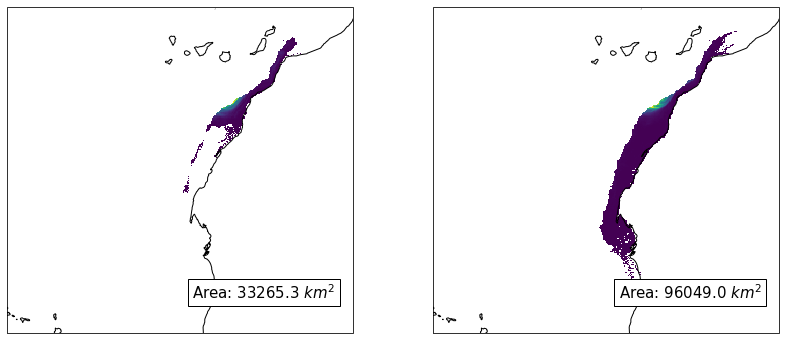

In [31]:

ens_list = [ensemble_100_mean.where(ensemble_100_mean>0),ensemble_mean.where(ensemble_mean>0)]
slice_list = [101,180]

fig, ax = plt.subplots(1, 2, subplot_kw={"projection": proj}, figsize=(14,6))

for i in range(2):
    ens_list[i].plot.pcolormesh(x = 'lon_bin', y = 'lat_bin',ax = ax[i], add_colorbar = False)
    area = xr.where(ens_list[i]>0,dx_km*dy_km,0).sum().values
    area = np.round(area,1)
    print(f'{"{:0.1f}".format(area)} km^2')
    ax[i].annotate(f'Area: {"{:0.1f}".format(area)} $km^2$',(-17.0,17.5),bbox={"fc": "white", "ec": "k", "lw": 1}, fontsize = 15 )#on africa
    ax[i].coastlines()


In [32]:
96049/33265

2.8873891477528932

In [33]:
t1 = area100
t2 = area180

diffs = (t1 -t2)
ranks = np.argsort(np.abs(diffs)) + 1

positive_ranks_sum = np.sum(ranks[diffs > 0])
negative_ranks_sum = np.sum(ranks[diffs < 0])
T = min(positive_ranks_sum, negative_ranks_sum)
n = 10
expc_T = n * (n + 1) / 4
std_dev_T = np.sqrt((n * (n + 1) * (2 * n + 1)) / 24)
z_score = (T - expc_T) / std_dev_T
p_value = 2 * (1 - np.abs(0.5 - (1 - np.exp(-z_score ** 2 / 2)) / np.sqrt(2 * np.pi)))
T,p_value

(0, 1.7821887712072302)